<a href="https://colab.research.google.com/github/abhigyandatta/outlier_detection_removal/blob/main/outlier_bangalore_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('bangalore_housing.csv')

In [3]:
df.head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305


In [4]:
# shape of dataset
df.shape

(13200, 7)

In [5]:
# statistical summary of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,13200.0,1555.302783,1237.323445,1.0,1100.0,1275.00,1672.0,52272.0
bath,13200.0,2.691136,1.338915,1.0,2.0,2.00,3.0,40.0
price,13200.0,112.276178,149.175995,8.0,50.0,71.85,120.0,3600.0
bhk,13200.0,2.800833,1.292843,1.0,2.0,3.00,3.0,43.0
price_per_sqft,13200.0,7920.336742,106727.160328,267.0,4267.0,5438.00,7317.0,12000000.0


# Outlier Removal for price_per_sqft (percentile method)

In [6]:
# create thresholds for quantiles for price_per_sq_ft
min_thresh_price_sqft,max_thresh_price_sqft=df['price_per_sqft'].quantile([0.01,0.99])

In [7]:
print('minimum threshold price_per_sqft: ',min_thresh_price_sqft)
print('maximum threshold price_per_sqft: ',max_thresh_price_sqft)

minimum threshold price_per_sqft:  2549.0
maximum threshold price_per_sqft:  23674.45000000001


In [8]:
# create new dataframe with outliers removed
df_outlier_removed=df[(df['price_per_sqft']>min_thresh_price_sqft) & (df['price_per_sqft']<max_thresh_price_sqft)]

In [9]:
# shape after outlier removal
df_outlier_removed.shape

(12932, 7)

In [10]:
#total rows that were removed
rows_removed=(df.shape[0]-df_outlier_removed.shape[0])
print("Percent of rows beyond bottom 1% and top 1%: ",(100*rows_removed/df.shape[0]))

Percent of rows beyond bottom 1% and top 1%:  2.0303030303030303


## Visualization of outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'After removing extreme 1 percentile')

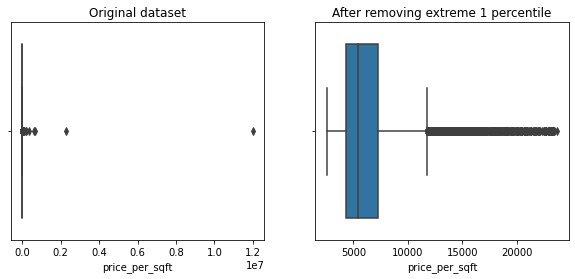

In [11]:
# plotting box-plots before and after outlier removal

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))

sns.boxplot(df['price_per_sqft'],ax=ax1)
ax1.set_title('Original dataset')

sns.boxplot(df_outlier_removed['price_per_sqft'],ax=ax2)
ax2.set_title('After removing extreme 1 percentile')

# Outlier Removal for price_per_sqft (z-score method)

## Let's further modify this dataset using Z-score outlier removal

In [12]:
from numpy.ma.core import mean
df_z=df_outlier_removed.copy()
df_z['z_score']=(df_z['price_per_sqft']-df_z['price_per_sqft'].mean())/df_z['price_per_sqft'].std()

In [13]:
df_z['z_score'].max()

4.90510435910586

In [14]:
# creating threshold between (-3,3) of z-score
z_min=-3
z_max=3

df_z=df_z[(df_z['z_score']>z_min)& (df_z['z_score']<z_max)]

In [15]:
#total rows removed
rows_removed=(df.shape[0]-df_z.shape[0])
print("Percent of rows beyond z=3: ",(100*rows_removed/df.shape[0]))

Percent of rows beyond z=3:  4.454545454545454


## Visualization after outlier removal by Z-score

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'After percentile and Z-score removal')

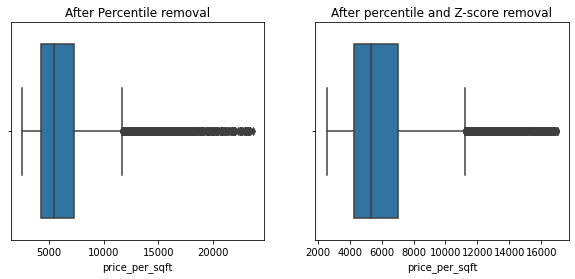

In [16]:
# plotting box-plots before and after outlier removal

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))

sns.boxplot(df_outlier_removed['price_per_sqft'],ax=ax1)
ax1.set_title('After Percentile removal')

sns.boxplot(df_z['price_per_sqft'],ax=ax2)
ax2.set_title('After percentile and Z-score removal')